In [68]:
from environment.TheoreticalMarket import *

tm = TheoreticalMarket(beta0 = 3, beta1 = -0.1, beta2 = -0.03, a = 0.05, ref_p = 1.5)

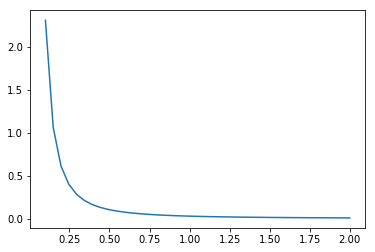

In [69]:

prices = np.linspace(0.1, 2, 40)
devs = [tm.compute_opt_dev(x) for x in prices]
# demand = [tm.demand_func(x) for x in prices]

import matplotlib.pyplot as plt

plt.plot(prices, devs)
# plt.plot(prices, demand)

In [57]:
tm.compute_opt_dev(1)

0.017955906145069797

In [58]:
devs

[1.3739935312727687,
 0.6328941010855718,
 0.3655947976422006,
 0.23931699857063768,
 0.169594595722134,
 0.126958638101611,
 0.09893263646397439,
 0.07949050702294878,
 0.06542833280344665,
 0.05491307247849577,
 0.04683345125150239,
 0.04048336105984669,
 0.03539634756929241,
 0.03125401644519656,
 0.027832876322656595,
 0.024972216848632843,
 0.02255401131557245,
 0.020489956585045474,
 0.0187128907268303,
 0.017170974467749445,
 0.015823662845522474,
 0.014638863306988001,
 0.013590896480227783,
 0.012659010196046414,
 0.011826281350793603,
 0.011078793889002556,
 0.010405016170415464,
 0.009795324199086792,
 0.009241632850581227,
 0.008737107957662811,
 0.008275939564226778,
 0.007853161899787641,
 0.00746450936150527,
 0.007106300481579739,
 0.006775343817301878,
 0.006468861142169695,
 0.0061844243863313254,
 0.005919903575853978,
 0.005673423625379118,
 0.0054433282992283364]

In [59]:
tm.compute_profit(0.01, np.array([0.01, 0.02, 0.02]))

0.00906396339373952

In [60]:
tm.get_c2(0.01)

2.636275146009085

In [61]:
tm.demand_func(0.01)

4.9312